simple example with random data generation

Initial kernel variance 0.5111586760281146
Initial kernel width 11.49628049779092
Learning step 0 at P= -82684633.9201144 , VAF= 0.03974721622530197 , rel. gradient length= 1.0
Learning step 100 at P= -69424490.46230721 , VAF= 0.053381137523316524 , rel. gradient length= 0.9151104958663351
Learning step 200 at P= -58303409.68033074 , VAF= 0.05945437162586187 , rel. gradient length= 0.8372485918225433
Learning step 300 at P= -48929148.79596485 , VAF= 0.062427175858230766 , rel. gradient length= 0.7654940440679514
Learning step 400 at P= -41006487.027285725 , VAF= 0.06384582228052893 , rel. gradient length= 0.6991654290173788
Learning step 500 at P= -34302952.39350715 , VAF= 0.06451586850034052 , rel. gradient length= 0.6377311560334096
Learning step 600 at P= -28632599.792026483 , VAF= 0.06481671821713986 , rel. gradient length= 0.5807785044951101
Learning step 700 at P= -23842770.578508582 , VAF= 0.06488887920961506 , rel. gradient length= 0.5279711971350151
Learning step 800 at P= -19

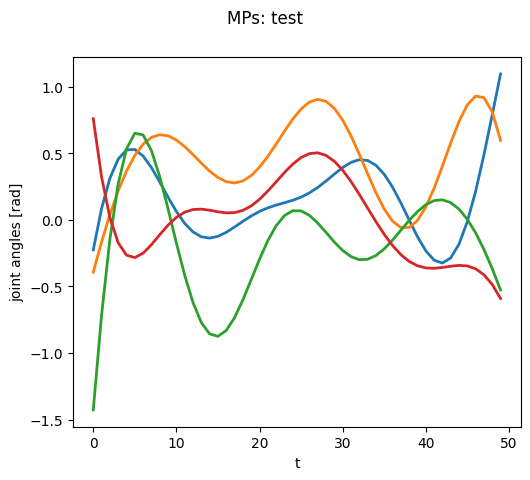

In [7]:
import numpy as np
import torch
from TMP_model import MP_model,TestTMPModel
from plotting import *
# Create synthetic data
num_signals = 3  # number of sensors/signals
num_segments = 6  # number of movement segments
num_MPs = 4  # number of movement primitives
num_t_points= 50

# Create segments of different lengths
data = []
for i in range(num_segments):
    # Random length between 40 and 80 time points
    time_points = np.random.randint(80, 100)
    # Create synthetic movement data
    segment = np.random.randn(num_signals, time_points)
    data.append(segment)

# Initialize model
model = MP_model(
    num_t_points=50,  # number of time discretization points
    num_MPs=num_MPs,
    init_data=data    # provide initial data
)

# Train model
model.learn(data, adam_steps=1000, bfgs_steps=1000)

# Make predictions
segment_lengths = [segment.shape[1] for segment in data]
predictions = model.predict(segment_lengths,as_numpy=True)

segment_lengths = [segment.shape[1] for segment in data]
predictions = model.predict(segment_lengths,as_numpy=True)
num_t_points = 50
plot_mp(torch.stack(list(model.MPs)),"test")
# plot_reconstructions(data,predictions,"student_{0:d}, PCA,".format(num_t_points))

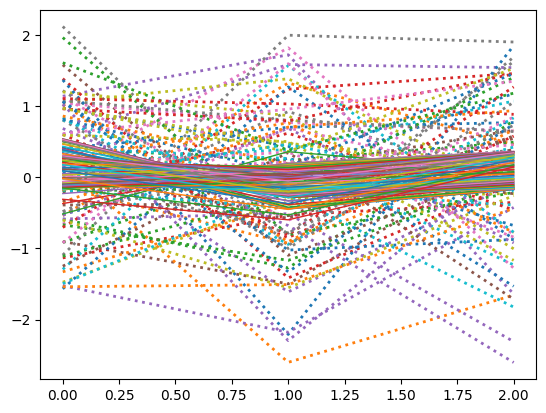

In [11]:
plt.plot(data[1],linewidth=2,linestyle="dotted",label="data")
plt.plot(predictions[1],linewidth=1,label="model")
plt.show()

In [5]:
model.noise_model
model.MPs
model.weights

ParameterList(
    (0): Parameter containing: [torch.float64 of size 3x4]
    (1): Parameter containing: [torch.float64 of size 3x4]
    (2): Parameter containing: [torch.float64 of size 3x4]
    (3): Parameter containing: [torch.float64 of size 3x4]
    (4): Parameter containing: [torch.float64 of size 3x4]
    (5): Parameter containing: [torch.float64 of size 3x4]
)

In [8]:
segment_lengths = [segment.shape[1] for segment in data]
segment_lengths

[85, 82, 97, 87, 85, 98]

example with BVH data --> 2 file

In [1]:
import numpy as np
import torch
from plotting import *
from TMP_model import MP_model,TestTMPModel

folder_path = "../../BVH_small"
    

# format for data=list(segment_data[signals,time])


    # Read BVH files
bvh_data = read_bvh_files(folder_path)
if not bvh_data:
    raise ValueError("No BVH files could be read")

# Process data according to paper specifications
processed_data2 = process_bvh_data(bvh_data)
# a = [torch.tensor(d) for d in processed_data2]
num_signals = processed_data2[0].shape[0]
num_segments = len(processed_data2)
num_MPs = 4  # number of movement primitives
num_t_points= 50

# Initialize model
model2 = MP_model(
    num_t_points=50,  # number of time discretization points
    num_MPs=num_MPs,
    init_data=processed_data2    # provide initial data
    # init_data= data
)

# Train model
model2.learn(processed_data2, adam_steps=100, bfgs_steps=100)

# Make predictions
segment_lengths = [segment.shape[1] for segment in processed_data2]
predictions2 = model2.predict(segment_lengths,as_numpy=True)

Successfully opened C_F_F_1.VP03_skeleton.bvh
Successfully opened C_F_F_1.VP02_skeleton.bvh
Processed segment shape: (60, 3528)
Processed segment shape: (60, 4038)
Initial kernel variance 70.08177656027145
Initial kernel width 13.85170524102113


/home/arefe/Movement_Project/Gaitformer_env/lib/python3.8/site-packages/torch/__init__.py:955: UserWarning: torch.set_default_tensor_type() is deprecated as of PyTorch 2.1, please use torch.set_default_dtype() and torch.set_default_device() as alternatives. (Triggered internally at ../torch/csrc/tensor/python_tensor.cpp:432.)
  _C._set_default_tensor_type(t)


Learning step 0 at P= -87716310262.87732 , VAF= 0.3482227965485616 , rel. gradient length= 1.0
Learning step 101 at P= -14504145598.306097 , VAF= 0.35143200225133286 , rel. gradient length= 0.6551058339814015
Learning step 102 at P= -14452466276.04973 , VAF= 0.3526458490573836 , rel. gradient length= 0.6287722713674683
Learning step 103 at P= -14049422739.957193 , VAF= 0.354371201061063 , rel. gradient length= 0.11406925645253645
Learning step 104 at P= -14043266049.15143 , VAF= 0.3545797761859829 , rel. gradient length= 0.024122239196168398
Learning step 105 at P= -14030453772.528757 , VAF= 0.3543845186588285 , rel. gradient length= 0.3069631460335861
Learning step 106 at P= -13917948116.6543 , VAF= 0.35635339174982184 , rel. gradient length= 0.8103076606199598
Learning step 107 at P= -13891188697.932383 , VAF= 0.3566239332849336 , rel. gradient length= 0.3092706524036815
Learning step 108 at P= -13890310398.862724 , VAF= 0.3566394034085436 , rel. gradient length= 0.024635407392801203

KeyboardInterrupt: 

In [2]:
import numpy as np
import torch
from plotting import *
from TMP_model import MP_model,TestTMPModel

folder_path = "../../BVH_small"
    
    # Read BVH files
bvh_data = read_bvh_files(folder_path)
if not bvh_data:
    raise ValueError("No BVH files could be read")

# Process data according to paper specifications
processed_data2 = process_bvh_data(bvh_data)
# a = [torch.tensor(d) for d in processed_data2]
num_signals = processed_data2[0].shape[0]
num_segments = len(processed_data2)
num_MPs = 4  # number of movement primitives
num_t_points= 50
print(num_signals)
print(num_segments)

Successfully opened C_F_F_1.VP03_skeleton.bvh
Successfully opened C_F_F_1.VP02_skeleton.bvh
Processed segment shape: (3528, 60)
Processed segment shape: (4038, 60)
3528
2


plot MPs

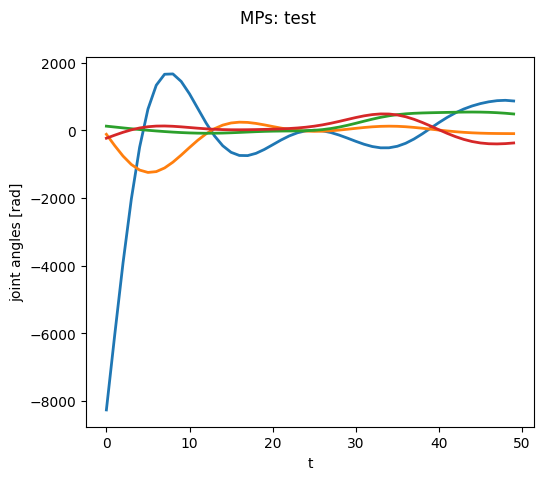

In [14]:
plot_mp(torch.stack(list(model2.MPs)),"test")
from plotting import *

# plot_reconstructions(processed_data,predictions,"student_{0:d}, PCA,".format(num_t_points))

plot reconstruction

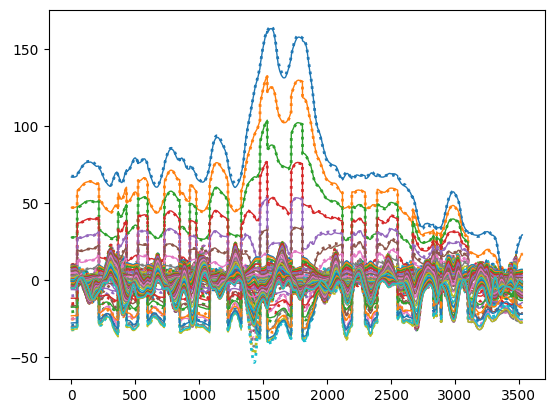

In [15]:
plt.plot(processed_data2[0],linewidth=2,linestyle="dotted",label="data")
plt.plot(predictions2[0],linewidth=1,label="model")
plt.show()

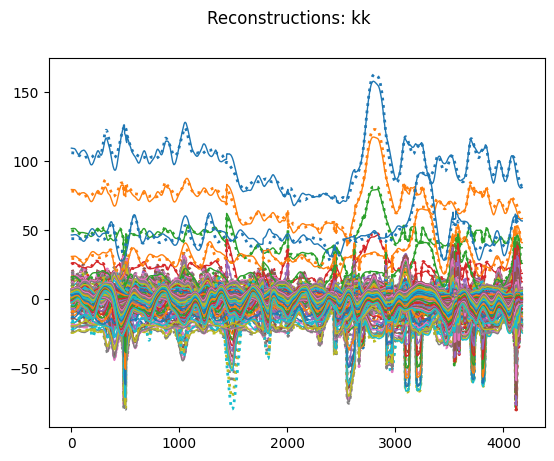

In [ ]:
def plot_reconstructions(orig,recon,num,title=""):
    
    plt.clf()
    for i in range(num):
        # plt.subplot(2,3,i+1)
        if i==0:
            plt.plot(orig[i],linewidth=2,linestyle="dotted",label="data")
            plt.plot(recon[i],linewidth=1,label="model")
            # plt.legend()
        else:
            plt.plot(orig[i],linewidth=2,linestyle="dotted")
            plt.plot(recon[i],linewidth=1)
            
    
    plt.suptitle("Reconstructions: "+title)
    plt.savefig("recon_"+title+".png")
    plt.show()

plot_reconstructions(processed_data2,predictions2,2,"test")
    

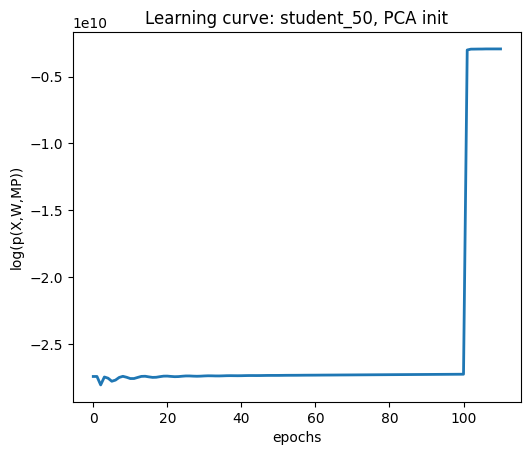

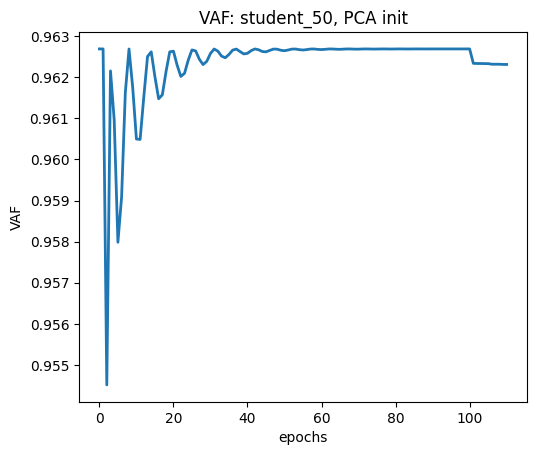

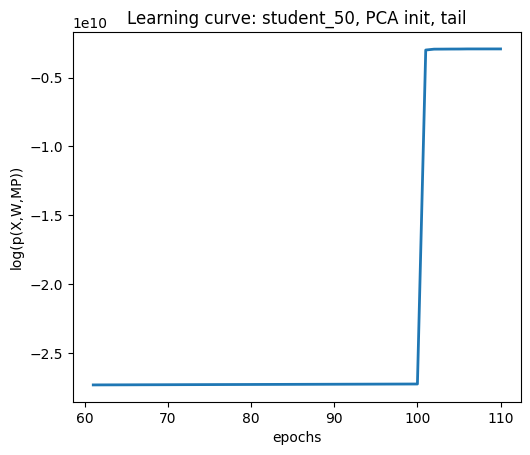

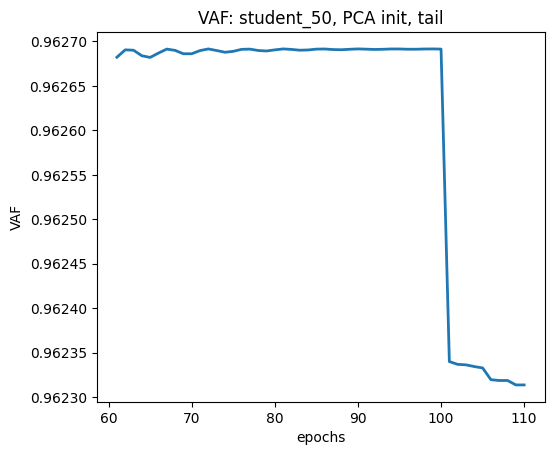

In [7]:
lc=model2.learn_curve
vc=model2.VAF_curve
epochs=numpy.arange(len(lc))

plot_learn_curve(epochs,lc,vc,"student_{0:d}, PCA init".format(50))
plot_learn_curve(epochs[-50:],lc[-50:],vc[-50:],"student_{0:d}, PCA init, tail".format(50))


In [46]:
num_signals = processed_data[0].shape[0]
num_segments = len(processed_data)
num_signals
num_segments

1